In [1]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
from scipy.spatial import distance
from sklearn.datasets import load_iris  # irisデータセットをロード
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sentence_transformers import SentenceTransformer
from sentence_transformers import models
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

/home/kontani0930/.pyenv/versions/3.9.6/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#データセットの管理
class NewsGroupDataset():
    def __init__(self):
        # jsonファイルのロード
        # load JSON 20newsgroup data
        with open("newsgroups.json") as fd:
            data = json.load(fd)
        # content, target(=class ID), target_name(=newsgroup name)
        content = data['content']
        target = data['target']
        target_names = data['target_names']
        # get dictionary values for content, target, and target_names
        content_value = content.values()
        target_value = target.values()
        target_name_value = target_names.values()
        # extract lists for content, target, and target_names
        self.content_value_list = list(content_value) # メッセージテキスト本体
        self.target_value_list = list(target_value) # メッセージのカテゴリ ID
        self.target_namevalue_list = list(target_name_value)
        num_docs = 11314 # (=len(content.keys()) 

In [3]:
#SentenceTransformerでの埋め込みデータを保持
class SentenceTransformerModel:
    def __init__(self, model_num):
        if model_num == 0:
            name = "cl-tohoku/bert-base-japanese-whole-word-masking"
        else:
            name = "sentence-transformers/all-MiniLM-L6-v2"
        transformer = models.Transformer(name)
        pooling = models.Pooling(transformer.get_word_embedding_dimension(),pooling_mode_mean_tokens=True, pooling_mode_cls_token=False, pooling_mode_max_tokens=False)
        self.model = SentenceTransformer(modules=[transformer, pooling])

    def gen_embeddings(self,sentences,label):
        embeddings=self.model.encode(sentences)
        self.df=pd.DataFrame(embeddings)
        self.label=pd.Series(data=label)


In [ ]:
class ClusteringModel:
    def __init__(self) -> None:
        pass

    def plot(self,df,labels):
        X=StandardScaler().fit_transform(df)
        pca=PCA(n_components=2).fit(X)
        X_pc=pca.transform(X)
        df_pc=pd.DataFrame(X_pc)
        plt.figure(figsize=(14,10))
        plt.scatter(df_pc.iloc[:,0],df_pc.iloc[:,1],c=labels,s=50)
        plt.show()

    def calc_purity(self,df,true_label,pred_label):
        #Cross Tableを作成
        crosstab=pd.crosstab(true_label,pred_label)
        #Cross Tableを用いてpurity値を計算
        tmp=.0
        for i in range(len(crosstab.index.values)):
            tmp+=max(crosstab[:][i])
        purity=tmp/len(df.values)
        print("purity: ",purity)

class KMeansModel(ClusteringModel):
    def __init__(self,cluster_num,df):
        #クラスタ数20でk-meansクラスタリングを実行
        self.df=df
        self.model=KMeans(n_clusters=20)
        self.model.fit(self.df.values)

    def plot(self):
        super().plot(self.df,self.model.labels_)
    
    def calc_purity(self,true_label):
        super().calc_purity(self.df,true_label,self.model.labels_)
    

In [5]:
dataset=NewsGroupDataset()
transformer_0=SentenceTransformerModel(0)
transformer_0.gen_embeddings(dataset.content_value_list,dataset.target_value_list)
kmeans=KMeansModel(20,transformer_0.df)
kmeans.plot()

Some weights of the model checkpoint at cl-tohoku/bert-base-japanese-whole-word-masking were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
dataset=NewsGroupDataset()
transformer_1=SentenceTransformerModel(1)
transformer_1.gen_embeddings(dataset.content_value_list,dataset.target_value_list)
kmeans=KMeansModel(20,transformer_1.df)
kmeans.plot()

In [ ]:
# jsonファイルのロード
# load JSON 20newsgroup data
with open("newsgroups.json") as fd:
    data = json.load(fd)
# content, target(=class ID), target_name(=newsgroup name)
content = data['content']
target = data['target']
target_names = data['target_names']
# get dictionary values for content, target, and target_names
content_value = content.values()
target_value = target.values()
target_name_value = target_names.values()
# extract lists for content, target, and target_names
content_value_list = list(content_value) # メッセージテキスト本体
target_value_list = list(target_value) # メッセージのカテゴリ ID
target_namevalue_list = list(target_name_value)
num_docs = 11314 # (=len(content.keys()) 

In [ ]:
transformer=models.Transformer("cl-tohoku/bert-base-japanese-whole-word-masking")
pooling = models.Pooling(transformer.get_word_embedding_dimension(), pooling_mode_mean_tokens=True, pooling_mode_cls_token=False, pooling_mode_max_tokens=False)
model = SentenceTransformer(modules=[transformer, pooling])

Some weights of the model checkpoint at cl-tohoku/bert-base-japanese-whole-word-masking were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


TypeError: __init__() got an unexpected keyword argument 'modules'

In [ ]:
sentences = ['吾輩は猫である',  '本日は晴天なり']
embeddings = model.encode(sentences)

In [ ]:
embeddings=model.encode(content_value_list)

In [ ]:
type(embeddings)

numpy.ndarray

In [ ]:
df=pd.DataFrame(embeddings)
label=pd.Series(data=target_value_list)

In [ ]:
#クラスタ数20でk-meansクラスタリングを実行
kmeans_model=KMeans(n_clusters=20)
kmeans_model.fit(df.values)

KMeans(n_clusters=20)

In [ ]:
#分類の実行結果を表示
kmeans_model.labels_

array([ 5,  6, 19, ...,  5,  4, 13], dtype=int32)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
X=StandardScaler().fit_transform(df)
pca=PCA(n_components=2)
pca.fit(X)
X_pc=pca.transform(X)
df_pc=pd.DataFrame(X_pc)

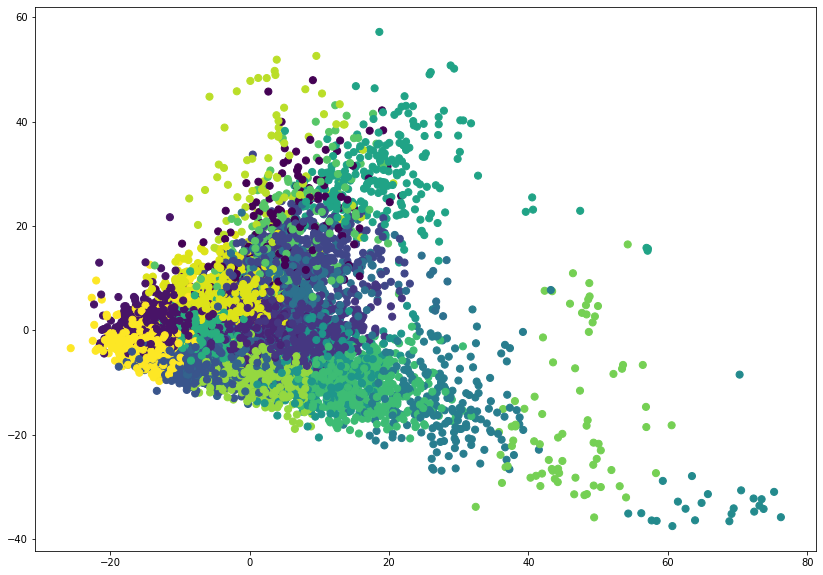

In [ ]:
plt.figure(figsize=(14,10))
plt.scatter(df_pc.iloc[:,0],df_pc.iloc[:,1],c=kmeans_model.labels_,s=50)
plt.show()

In [ ]:
#Cross Tableを作成
crosstab=pd.crosstab(label,kmeans_model.labels_)
crosstab

col_0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
row_0,,,,,,,,,,,,,,,,,,,,
0,0,96,35,17,6,22,10,17,3,1,9,1,100,4,2,1,14,0,87,55
1,16,5,54,63,28,34,63,22,8,1,35,21,39,31,20,2,85,4,28,25
2,14,20,84,58,38,54,44,26,10,2,40,25,29,23,17,19,51,3,29,5
3,14,11,102,35,43,79,36,22,18,0,50,13,20,31,11,0,65,6,26,8
4,10,19,111,42,19,66,30,15,7,0,33,12,41,29,13,0,65,9,38,19
5,12,8,66,63,36,42,75,36,9,0,34,23,41,34,15,1,48,7,24,19
6,14,4,33,96,28,28,41,26,47,4,50,16,8,94,13,14,45,12,8,4
7,8,84,74,35,18,63,22,12,4,2,10,4,56,23,7,0,66,4,77,25
8,9,70,121,41,27,77,15,20,5,1,12,16,40,20,18,3,38,6,44,15


In [ ]:
#Cross Tableを用いてpurity値を計算
tmp=.0
for i in range(len(crosstab.columns.values)):
    tmp+=max(crosstab[:][i])
purity=tmp/len(df.values)
print("purity: ",purity)

purity:  0.12100053031642213


In [ ]:
model=GaussianMixture(n_components=20)
model.fit(df.values)
X=StandardScaler().fit_transform(df)
pca=PCA(n_components=2)
pca.fit(X)
X_pc=pca.transform(X)
df_pc=pd.DataFrame(X_pc)

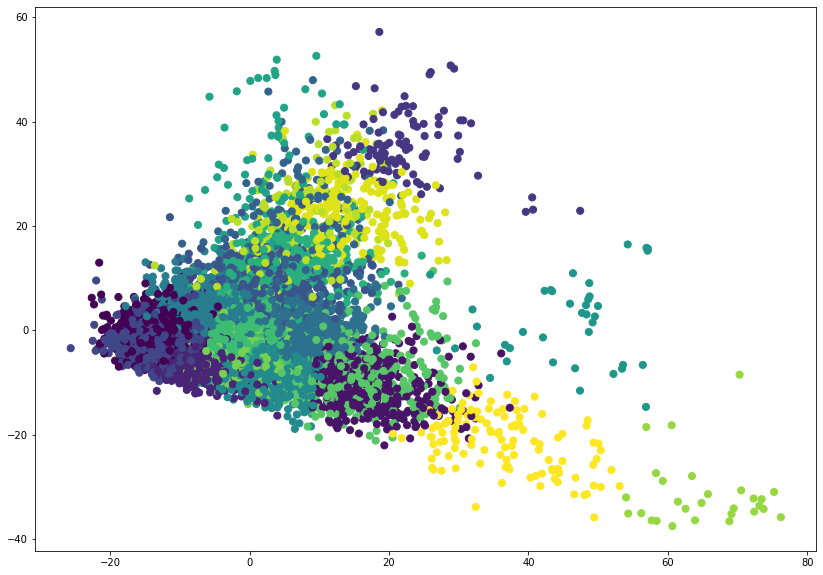

In [ ]:
plt.figure(figsize=(14,10))
plt.scatter(df_pc.iloc[:,0],df_pc.iloc[:,1],c=model.predict(df.values),s=50)
plt.show()

In [ ]:
#Cross Tableを作成
crosstab=pd.crosstab(label,model.predict(df.values))
#Cross Tableを用いてpurity値を計算
tmp=.0
for i in range(len(crosstab.index.values)):
    tmp+=max(crosstab[:][i])
purity=tmp/len(df.values)
print("purity: ",purity)

purity:  0.12038182782393494


In [ ]:
crosstab

col_0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
row_0,,,,,,,,,,,,,,,,,,,,
0,19,6,1,6,29,37,10,96,52,2,105,3,83,16,1,3,1,0,10,0
1,40,49,1,27,82,11,63,23,45,2,41,16,6,85,20,12,18,11,28,4
2,55,31,2,38,80,18,34,7,71,19,42,16,21,48,23,17,16,12,38,3
3,71,33,0,41,59,14,30,9,101,0,33,24,10,68,13,7,10,12,49,6
4,58,41,0,19,63,14,33,16,98,0,49,9,23,74,11,11,11,9,30,9
5,48,53,0,33,76,19,76,29,51,1,33,14,7,49,23,16,15,10,33,7
6,28,131,4,27,49,9,38,3,30,17,14,71,4,52,16,18,12,12,38,12
7,52,28,2,18,40,24,20,37,90,0,92,9,79,68,4,2,7,8,10,4
8,42,27,1,27,82,20,16,23,126,3,59,10,65,35,15,5,16,8,12,6


In [ ]:
from sklearn.cluster import SpectralClustering
model=SpectralClustering(n_clusters=20)
model.fit(df.values)
X=StandardScaler().fit_transform(df)
pca=PCA(n_components=2)
pca.fit(X)
X_pc=pca.transform(X)
df_pc=pd.DataFrame(X_pc)

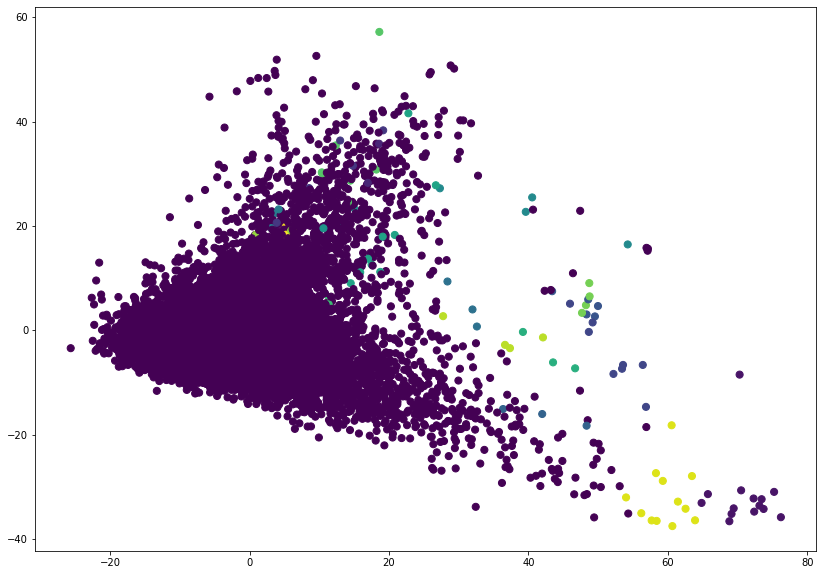

In [ ]:
plt.figure(figsize=(14,10))
plt.scatter(df_pc.iloc[:,0],df_pc.iloc[:,1],c=model.labels_,s=50)
plt.show()

In [ ]:
#Cross Tableを作成
crosstab=pd.crosstab(label,model.labels_)
#Cross Tableを用いてpurity値を計算
tmp=.0
for i in range(len(crosstab.index.values)):
    tmp+=max(crosstab[:][i])
purity=tmp/len(df.values)
print("purity: ",purity)

purity:  0.05904189499734842


In [ ]:
crosstab

col_0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
row_0,,,,,,,,,,,,,,,,,,,,
0,479,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,581,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,568,2,0,1,7,5,0,0,0,0,2,0,0,0,0,4,0,0,0,2
3,589,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,576,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
5,592,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6,576,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3,0,3,0
7,590,2,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0
8,598,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
